# Dividir el dataset en conjunto de entrenamiento y de testing

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("../datasets/ads/Advertising.csv")

In [3]:
a = np.random.randn(len(data))

(array([  2.,   6.,  10.,  38.,  39.,  45.,  32.,  15.,   9.,   4.]),
 array([ -2.92017019e+00,  -2.33576048e+00,  -1.75135078e+00,
         -1.16694107e+00,  -5.82531358e-01,   1.87835010e-03,
          5.86288058e-01,   1.17069777e+00,   1.75510748e+00,
          2.33951718e+00,   2.92392689e+00]),
 <a list of 10 Patch objects>)

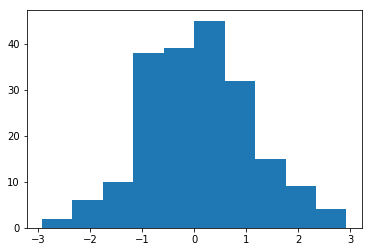

In [4]:
plt.hist(a)

In [5]:
check = (a< 0.8)
training = data[check]
testing = data[~check]

In [6]:
len(training), len(testing)

(151, 49)

In [7]:
import statsmodels.formula.api as smf

In [8]:
lm = smf.ols(formula="Sales~TV+Radio", data=training).fit()

In [9]:
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.886
Model:                            OLS   Adj. R-squared:                  0.885
Method:                 Least Squares   F-statistic:                     576.9
Date:                Sun, 05 Aug 2018   Prob (F-statistic):           1.33e-70
Time:                        10:30:46   Log-Likelihood:                -298.07
No. Observations:                 151   AIC:                             602.1
Df Residuals:                     148   BIC:                             611.2
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.8470      0.360      7.910      0.000       2.136       3.558
TV             0.0459      0.002     28.146      0.000       0.043       0.049
Radio          0.1846      0.010     19.276      0.000       0.166       0.203
==============================================================================
Omnibus:                       44.872   Durbin-Watson:                   1.874
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               99.429
Skew:                          -1.277   Prob(JB):                     2.57e-22
Kurtosis:                       6.047   Cond. No.                         435.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Sales = 2.9933 + 0.0445 * TV + 0.1957 * Radio

## Validacion del modelo con el conjunto de testing

In [10]:
sales_pred = lm.predict(testing)
sales_pred

3      17.430825
11     17.141695
13      8.729639
22      6.388140
23     16.456146
24      8.035113
25     15.572721
29      9.044018
31     11.246020
33     18.742175
36     23.194659
38      9.755338
40     16.267360
45     15.045296
49      8.080362
55     21.103777
58     21.687473
59     17.973034
61     22.734324
62     16.703178
66      8.834744
67     11.923799
73      9.844702
75     11.689177
76      4.405856
79      9.598136
84     20.593375
89     16.714490
94     10.365769
104    20.122540
105    17.747235
107     7.056051
116    11.882290
120    14.285898
132     8.253223
133    19.129439
138     9.603087
139    19.445372
144     9.998806
152    16.226784
154    15.370439
159    12.294414
161    13.392308
173    11.895075
174    13.693366
177    12.106980
182     6.481301
183    23.998130
189     5.939491
dtype: float64

In [11]:
SSD =  sum((testing.Sales - sales_pred)**2)
SSD

102.3686460295567

In [12]:
RSE = np.sqrt(SSD/(len(testing)-2-1))
RSE

1.4917792559452703

In [13]:
sales_mean = np.mean(testing.Sales)
error = RSE / sales_mean
error

0.10452907699316208

ValueError: x and y must have same first dimension, but have shapes (200, 1) and (49,)

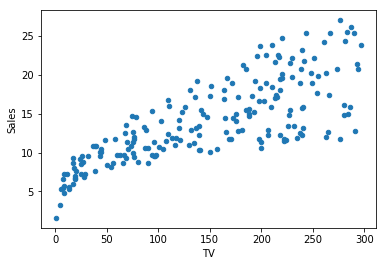

In [14]:
%matplotlib inline 
data.plot(kind="scatter", x = "TV", y ="Sales")
plt.plot(pd.DataFrame(data.TV), sales_pred, c="red", linewidth = 2)

FileNotFoundError: [Errno 2] No such file or directory: 'resources/summary-lm.png'